In [571]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [573]:
df = pd.read_csv("data.csv")

In [575]:
print(df.head())

            Timestamp  1. What is your age? 2. Gender 3. Relationship Status  \
0  4/18/2022 19:18:47                  21.0      Male      In a relationship   
1  4/18/2022 19:19:28                  21.0    Female                 Single   
2  4/18/2022 19:25:59                  21.0    Female                 Single   
3  4/18/2022 19:29:43                  21.0    Female                 Single   
4  4/18/2022 19:33:31                  21.0    Female                 Single   

  4. Occupation Status 5. What type of organizations are you affiliated with?  \
0   University Student                                         University       
1   University Student                                         University       
2   University Student                                         University       
3   University Student                                         University       
4   University Student                                         University       

  6. Do you use social media?  \

In [577]:
print(df.tail())

               Timestamp  1. What is your age? 2. Gender  \
476   5/21/2022 23:38:28                  24.0      Male   
477    5/22/2022 0:01:05                  26.0    Female   
478   5/22/2022 10:29:21                  29.0    Female   
479   7/14/2022 19:33:47                  21.0      Male   
480  11/12/2022 13:16:50                  53.0      Male   

    3. Relationship Status 4. Occupation Status  \
476                 Single      Salaried Worker   
477                Married      Salaried Worker   
478                Married      Salaried Worker   
479                 Single   University Student   
480                Married      Salaried Worker   

    5. What type of organizations are you affiliated with?  \
476                                University, Private       
477                                         University       
478                                         University       
479                                         University       
480                   

In [579]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             481 non-null    object 
 1   1. What is your age?                                                                                                  481 non-null    float64
 2   2. Gender                                                                                                             481 non-null    object 
 3   3. Relationship Status                                                                                                481 non-null    object 
 4   4. Occup

In [581]:
print(df.describe())

       1. What is your age?  \
count             481.00000   
mean               26.13659   
std                 9.91511   
min                13.00000   
25%                21.00000   
50%                22.00000   
75%                26.00000   
max                91.00000   

       9. How often do you find yourself using Social media without a specific purpose?  \
count                                         481.000000                                  
mean                                            3.553015                                  
std                                             1.096299                                  
min                                             1.000000                                  
25%                                             3.000000                                  
50%                                             4.000000                                  
75%                                             4.000000                           

In [583]:
print(df.isnull().sum())

Timestamp                                                                                                                0
1. What is your age?                                                                                                     0
2. Gender                                                                                                                0
3. Relationship Status                                                                                                   0
4. Occupation Status                                                                                                     0
5. What type of organizations are you affiliated with?                                                                  30
6. Do you use social media?                                                                                              0
7. What social media platforms do you commonly use?                                                                      0
8. What is the a

In [603]:
df_simple = df[['8. What is the average time you spend on social media every day?',
                '20. On a scale of 1 to 5, how often do you face issues regarding sleep?']].copy()

In [605]:
df_simple.columns = ['social_media_time', 'sleep_issue']
df_simple['social_media_time'] = df_simple['social_media_time'].str.lower()
print(df_simple.isnull().sum())

social_media_time    0
sleep_issue          0
dtype: int64


In [607]:
mapping = {
    'less than an hour': 0.5,
    'between 1 and 2 hours': 1.5,
    'between 2 and 3 hours': 2.5,
    'between 3 and 4 hours': 3.5,
    'between 4 and 5 hours': 4.5,
    'more than 5 hours': 6.0
}
df_simple['social_media_time'] = df_simple['social_media_time'].map(mapping)
df_simple.head()
print(df_simple.isnull().sum())

social_media_time    0
sleep_issue          0
dtype: int64


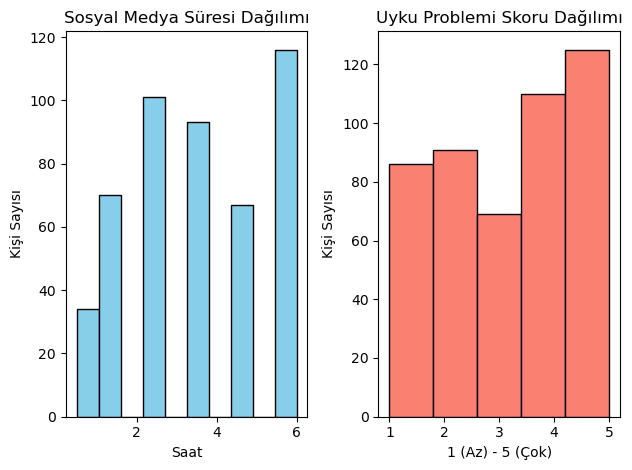

In [609]:
plt.subplot(1, 2, 1)
plt.hist(df_simple['social_media_time'], bins=10, color='skyblue', edgecolor='black')
plt.title('Sosyal Medya Süresi Dağılımı')
plt.xlabel('Saat')
plt.ylabel('Kişi Sayısı')

plt.subplot(1, 2, 2)
plt.hist(df_simple['sleep_issue'], bins=5, color='salmon', edgecolor='black')
plt.title('Uyku Problemi Skoru Dağılımı')
plt.xlabel('1 (Az) - 5 (Çok)')
plt.ylabel('Kişi Sayısı')
plt.tight_layout()
plt.show()

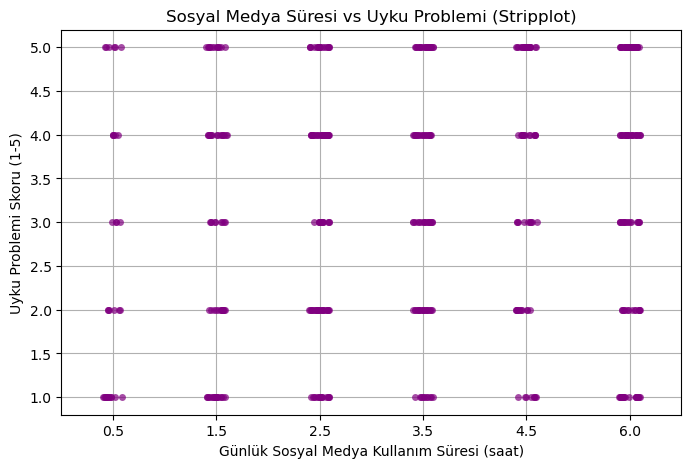

In [610]:
plt.figure(figsize=(8, 5))
sns.stripplot(x='social_media_time', y='sleep_issue', data=df_simple, jitter=True, color='purple', alpha=0.7)
plt.title('Sosyal Medya Süresi vs Uyku Problemi (Stripplot)')
plt.xlabel('Günlük Sosyal Medya Kullanım Süresi (saat)')
plt.ylabel('Uyku Problemi Skoru (1-5)')
plt.grid(True)
plt.show()

In [612]:
correlation = df_simple.corr(numeric_only=True)
print(correlation)

                   social_media_time  sleep_issue
social_media_time           1.000000     0.169877
sleep_issue                 0.169877     1.000000


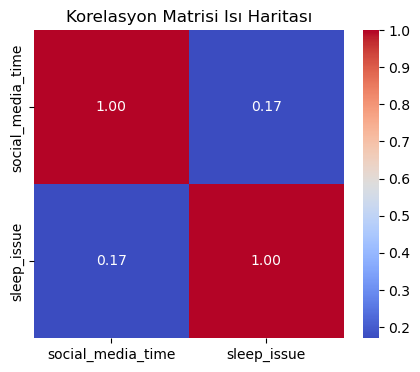

In [615]:
plt.figure(figsize=(5, 4))
sns.heatmap(df_simple.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi Isı Haritası')
plt.show()

In [617]:
data = df_simple['sleep_issue'].dropna()

mean = np.mean(data)
std = np.std(data, ddof=1)  # Örneklem standart sapması
n = len(data)
confidence = 0.95
z = stats.norm.ppf(1 - (1 - confidence) / 2)  # 95% güven için z ≈ 1.96

margin_of_error = z * (std / np.sqrt(n))
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

print(f"{confidence*100:.0f}% güven aralığı: ({lower_bound:.2f}, {upper_bound:.2f})")

95% güven aralığı: (3.07, 3.33)


In [623]:
import statsmodels.api as sm

X = df_simple['social_media_time']
Y = df_simple['sleep_issue']

X = sm.add_constant(X)  # Sabit terim ekle (β0 için)
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sleep_issue   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     14.23
Date:                Thu, 29 May 2025   Prob (F-statistic):           0.000182
Time:                        22:18:14   Log-Likelihood:                -857.53
No. Observations:                 481   AIC:                             1719.
Df Residuals:                     479   BIC:                             1727.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.7024      0.14

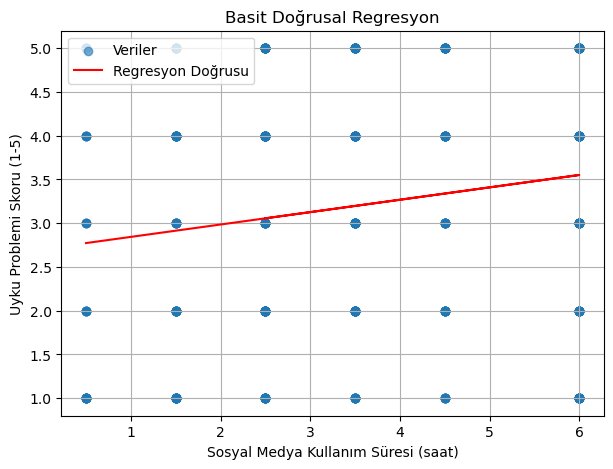

In [625]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))

plt.scatter(df_simple['social_media_time'], df_simple['sleep_issue'], alpha=0.6, label='Veriler')
plt.plot(df_simple['social_media_time'], model.predict(X), color='red', label='Regresyon Doğrusu')

plt.xlabel('Sosyal Medya Kullanım Süresi (saat)')
plt.ylabel('Uyku Problemi Skoru (1-5)')
plt.title('Basit Doğrusal Regresyon')
plt.legend()
plt.grid(True)
plt.show()

In [639]:
X_new = pd.DataFrame({
    'const': 1,  # Sabit terim için 1 koymalısın
    'social_media_time': [0.5, 1.5, 3.0, 5.0, 6.0]
})
# Tahminler:
fitted_values = model.predict(X_new)
print(fitted_values)

0    2.773135
1    2.914605
2    3.126810
3    3.409751
4    3.551221
dtype: float64


In [641]:
mse = np.mean((Y - fitted_values)**2)
print("Mean Squared Error:", mse)

Mean Squared Error: 4.262552640436627


In [643]:
r_squared = model.rsquared
print("R-squared:", r_squared)

R-squared: 0.02885814978358192


In [649]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Örnek: social_media_time'ı kategorilere ayır
# (örneğin saatleri 3 gruba ayıralım)
df_simple['social_media_cat'] = pd.cut(df_simple['social_media_time'],
                                       bins=[-np.inf, 2, 4, np.inf],
                                       labels=['Az', 'Orta', 'Çok'])

# ANOVA modeli kur
model = ols('sleep_issue ~ C(social_media_cat)', data=df_simple).fit()

# ANOVA tablosu çıkar
anova_table = sm.stats.anova_lm(model, typ=1)
print(anova_table)

                        df      sum_sq    mean_sq         F    PR(>F)
C(social_media_cat)    2.0   31.065239  15.532619  7.466603  0.000641
Residual             478.0  994.373431   2.080279       NaN       NaN
